# Importing libraries

In [1]:
import sys
sys.path.append('/Users/s2223060/Desktop/primordial_features/')
import numpy as np
import matplotlib.pyplot as plt
from ps_constructor import PowerSpectrumConstructor

# Initializing the PS constructor

The initializationg of the constructor requires a file containing the linear matter power spectrum (w/ and w/o the wiggles) and the wiggly matter power spectrum. We will teach how to generate it in another file. Here, I will use these products for BOSS high-z

In [2]:
fn = '/Users/s2223060/Desktop/primordial_features/cosmologies/power_spectrum/BOSS_z1.txt'

In [3]:
#momentum array to evaluate the data on
kh_data = np.linspace(1e-3, 0.2, 1000)

In [4]:
ps_model_lin = PowerSpectrumConstructor(fn, 'lin', kh_data)
ps_model_log = PowerSpectrumConstructor(fn, 'log', kh_data)
ps_model_none = PowerSpectrumConstructor(fn, 'None', kh_data)

In [5]:
BNGC = 1
BSGC = 1
sigma_nl = 0
sigma_s = 0
a0 = 0
a1 = 0
a2 = 0
a3 = 0
a4 = 0
alpha = 1
A = 0.1
omega_lin = 200
omega_log = 30
phi = 0.2
params = [BNGC, BSGC, sigma_nl, sigma_s, a0, a1, a2, a3, a4, alpha]



Once the parameters are listed, the PF models can be easily accessed:

In [7]:
ps_lin = ps_model_lin.Evaluate_bare(params + [A, omega_lin, phi])
ps_log = ps_model_log.Evaluate_bare(params + [A, omega_log, phi])
ps_none = ps_model_none.Evaluate_bare(params)

In [10]:
data = [x[:len(x)//2] for x in [ps_lin,ps_log, ps_none]]
labels = ['Linear Feature', 'Logarithmic Feature', 'Only BAO']

Linear Feature
Logarithmic Feature
Only BAO


Text(0, 0.5, '$kP(k)$')

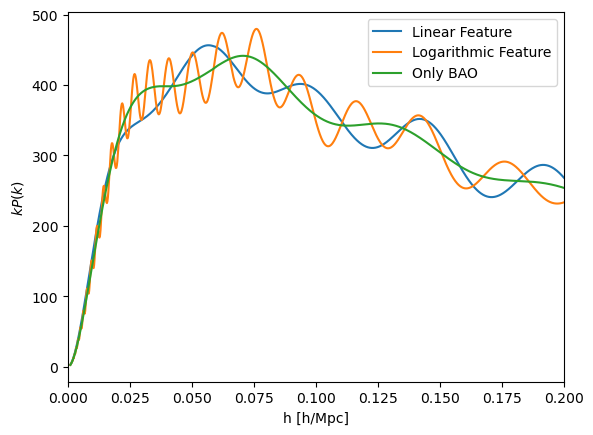

In [11]:
plt.figure()
for x,label in zip(data, labels):
    print(label)
    plt.plot(kh_data, kh_data*x, label = label)
plt.legend()
plt.xlim(0,0.2)
plt.xlabel('h [h/Mpc]')
plt.ylabel(r'$kP(k)$')